In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("employeeattribution.csv.zip",compression='zip')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [4]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(1470, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfacti

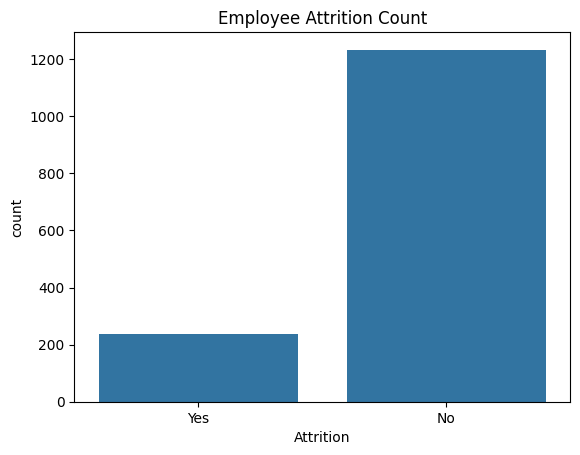

In [5]:
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count")
plt.show()

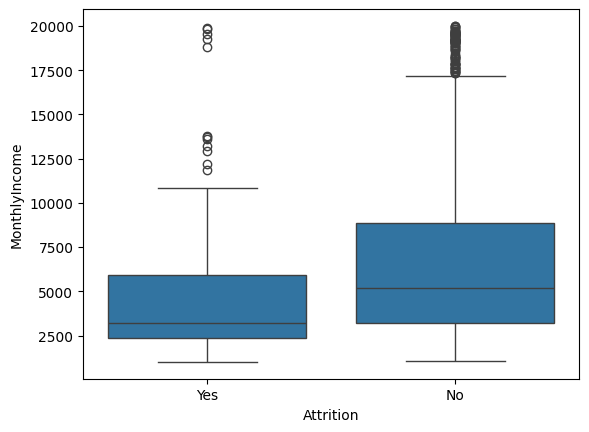

In [6]:
sns.boxplot(x='Attrition',y='MonthlyIncome', data=df)
plt.show()

In [7]:
df.drop(['EmployeeCount',
         'EmployeeNumber',
         'Over18',
         'StandardHours'], axis=1, inplace=True, errors='ignore')
df['Attrition']=df['Attrition'].map({'Yes':1, 'No':0})
df=pd.get_dummies(df, drop_first=True)

In [8]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)

In [9]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred=lr.predict(X_test)
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.55      0.44      0.49        39

    accuracy                           0.88       294
   macro avg       0.73      0.69      0.71       294
weighted avg       0.87      0.88      0.87       294



In [11]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print("Decision Tree Accuracy:",
      accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 0.7755102040816326


In [12]:
rf=RandomForestClassifier(n_estimators=100,class_weight='balanced')
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print("Random Forest Accuracy:",
      accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       1.00      0.08      0.14        39

    accuracy                           0.88       294
   macro avg       0.94      0.54      0.54       294
weighted avg       0.89      0.88      0.83       294



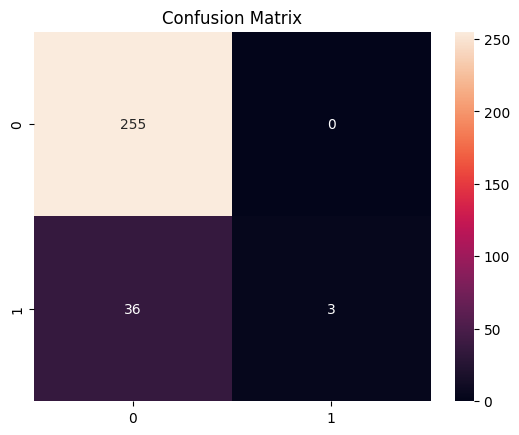

In [13]:
cm=confusion_matrix(y_test,rf_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [14]:
importance=rf.feature_importances_
feature_names=X.columns
feature_df=pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})
feature_df=feature_df.sort_values(
    by='Importance',
    ascending=False)
print(feature_df.head(10))

              Feature  Importance
9       MonthlyIncome    0.071952
43       OverTime_Yes    0.067039
0                 Age    0.060759
1           DailyRate    0.049048
19     YearsAtCompany    0.045833
5          HourlyRate    0.045013
10        MonthlyRate    0.041957
16  TotalWorkingYears    0.041495
2    DistanceFromHome    0.039820
15   StockOptionLevel    0.039557


In [15]:
sample=X_test[0].reshape(1,-1)
prediction=rf.predict(sample)
if prediction[0] == 1:
  print("Employee will Leave")
else:
  print("Employee will Stay")

Employee will Stay


In [16]:
import joblib
joblib.dump(rf,'employee_attrition_model.pkl')
print("Model saved successfully")

Model saved successfully
